In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21] # 정상이라면 [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

In [17]:
 # dice를 대상으로 prob 확률을 따라 100개의 데이터 무작위로 뽑기
np.random.seed(42) # 같은 난수 발생의 재현을 위한 설정
samples = np.random.choice(dice, size=100, p=prob)
samples2 = np.random.choice(dice, size=10000, p=prob)

In [18]:
freq, _ = np.histogram(samples, bins=6, range=(1, 7))
freq2, _ = np.histogram(samples2, bins=6, range=(1, 7))

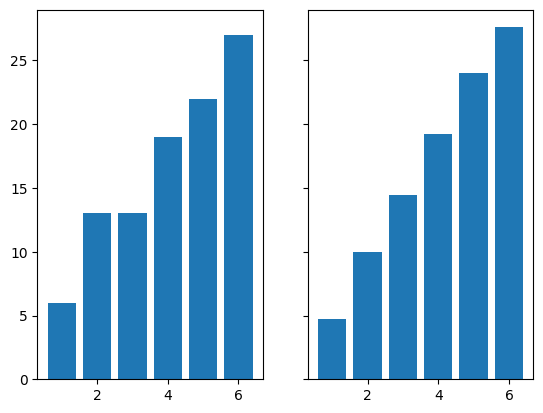

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

axes[0].bar(range(1, 7), freq)
axes[1].bar(range(1, 7), freq2/100)
plt.show()

In [ ]:
np.random.seed(42)

base_numbers = np.arange(1, 46)
base_numbers
prob = [1/45] * 45
prob
np.random.choice(base_numbers, 6, p=prob, replace=False) # replace=False : 비복원추출

means = []
for _ in range(100000):
    numbers = np.random.choice(base_numbers, 6, p=prob, replace=False) # 6개 숫자 뽑기
    # numbers = np.random.choice(base_numbers, 10, p=prob, replace=False) # 10개 숫자 뽑기
    mean = np.mean(numbers) # 평균 계산
    means.append(mean) # 평균 목록에 추가


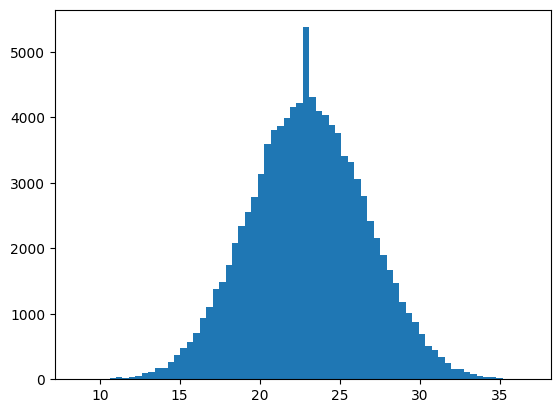

In [39]:
plt.hist(means, bins=70)
plt.show()

In [29]:
42.5-3.5

39.0

In [2]:
df_potato = pd.read_csv('data-files/ch11_potato.csv')
df_potato.shape
df_potato

,무게
0,122.02
1,131.73
2,130.60
3,131.82
4,132.05
5,126.12
6,124.43
7,132.89
8,122.79
9,129.95


In [4]:
df_potato.mean(), df_potato.std(ddof=0)

(무게    128.450714
 dtype: float64,
 무게    3.838678
 dtype: float64)

In [ ]:
# 정규성 테스트
stats.shapiro(df_potato.values)

ShapiroResult(statistic=np.float64(0.9412716764774873), pvalue=np.float64(0.43486250497195694))

In [9]:
# 감자 샘플의 무게 평균은 128.45이지만 실제 모집단의 무게 평균은 133 이라는 주장을 검정
# 감자 샘플은 표준 감자 품질(무게 133)보다 낮다는 주장을 검정

# stats.ttest_1samp(df_potato.values, 133)
# stats.ttest_1samp(df_potato.values, 130.5)

# stats.ttest_1samp(df_potato.values, 133, alternative="two-sided") # 양측검정 ( 가설 : == )
stats.ttest_1samp(df_potato.values, 133, alternative="less") # 단측검정 ( 가설 : < )
# stats.ttest_1samp(df_potato.values, 133, alternative="greater") # 단측검정 ( 가설 : > )

TtestResult(statistic=array([-4.27300298]), pvalue=array([0.00045379]), df=array([13]))

In [17]:
# 연속형 데이터 2표본(대응표본)에 대한 가설 검정

df_training_rel = pd.read_csv('data-files/ch11_training_rel.csv')
df_training_rel

before = df_training_rel['전'].values
after = df_training_rel['후'].values

print( after.mean() - before.mean() )
print( (after - before).mean() )

print( stats.ttest_rel(before, after) ) # 대응표본 test 방식
print( stats.ttest_ind(before, after) ) # 독립표본 test 방식

5.399999999999999
5.4
TtestResult(statistic=np.float64(-2.204154108716127), pvalue=np.float64(0.04004419061842953), df=np.int64(19))
TtestResult(statistic=np.float64(-1.8997443074539122), pvalue=np.float64(0.0650756655596349), df=np.float64(38.0))
